In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
dataset=pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']


In [4]:
#Descobrindo valores faltantes
#Percebemos que PoolQC, MiscFeature, Alley, Fence e FireplaceQU possuem uma grande quantidade de valores faltantes
valores_faltantes = (dataset.isnull().sum() / len(dataset)) * 100
valores_faltantes = valores_faltantes[valores_faltantes > 0] 
print(valores_faltantes.sort_values())

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64


C:\Users\Philippe\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


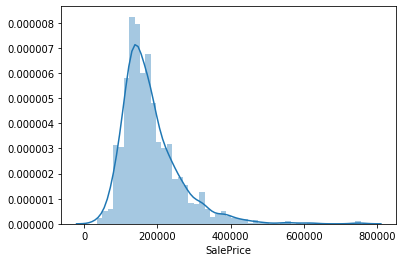

In [5]:
#Criando o gráfico preço de venda observamos que a distriuição não é normalizada
#E tem uma calda longa à direita. 
#Isso é, as vendas estao mais concentrados nos valores entre $150.000 e $250.000. 
sns.distplot(dataset['SalePrice'])

In [6]:
#A maioria dos algoritimos de machine learning funcionam melhor em dados de distribuição normalizada
#a coluna SalePrice será transformada posteriormente usando logítimo e escala
salepriceLog = np.log(dataset['SalePrice'])

C:\Users\Philippe\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


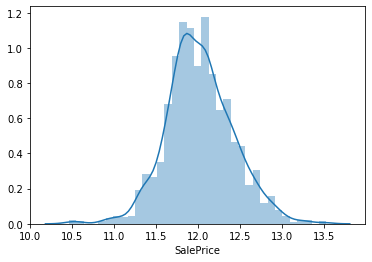

In [36]:
#No gráfico agora a variável parece melhor distribuída
sns.distplot(salepriceLog)

In [7]:
#Separando features numéricas e categóricas
featuresNumericas = dataset.select_dtypes(include = [np.number])
featuresCategoricas = dataset.select_dtypes(exclude = [np.number])

In [8]:
print('Temos {0} features numéricas e {1} features categóricas'.format(featuresNumericas.shape, featuresCategoricas.shape))

Temos (1460, 38) features numéricas e (1460, 43) features categóricas


In [9]:
#O Id das vendas não impacta no valor da venda, visto que ele só é usado para indentificação. 
#pontanto setá removido
del featuresNumericas['Id']

In [10]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


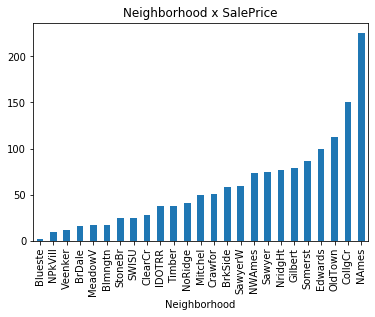

In [11]:
#O gráfico mostra quais bairros tem a maior quantidade de vendas
dataset.groupby(dataset['Neighborhood'])['SalePrice'].count().sort_values().plot.bar()
plt.title("Neighborhood x SalePrice")
plt.show()

In [12]:
print(featuresCategoricas)

     MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave   NaN  

In [18]:
#Lidando com valores faltantes
#Os valores categóricos faltantes serão substituidos pelo termo 'Missing' 
def trataValor(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=trataValor(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [19]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [20]:
numerical_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

In [22]:
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% valores ausentes".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% valores ausentes
MasVnrArea: 0.0055% valores ausentes
GarageYrBlt: 0.0555% valores ausentes


In [23]:
#Os valores faltantes nas features numéricas serão subistituídos pela mediana dos valores da coluna, 
#visto que existem outliers que podem criar uma média não confiavel
for feature in numerical_with_nan:
    median_value=dataset[feature].median()
    
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [38]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,1,Reg,1,1,1,1,1,Norm,Norm,1,2,7,5,2003,2003,Gable,1,1,1,1,196.0,1,2,1,1,2,2,1,706,Unf,0,150,856,1,1,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,Missing,Attchd,2003.0,RFn,2,548,TA,2,1,0,61,0,0,0,0,2,4,4,0,2,2008,1,1,208500
1,2,20,2,80.0,9600,1,1,Reg,1,1,2,1,2,Feedr,Norm,1,1,6,8,1976,1976,Gable,1,2,2,2,0.0,2,2,2,1,2,1,2,978,Unf,0,284,1262,1,1,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,TA,Attchd,1976.0,RFn,2,460,TA,2,1,298,0,0,0,0,0,2,4,4,0,5,2007,1,1,181500
2,3,60,2,68.0,11250,1,1,IR1,1,1,1,1,1,Norm,Norm,1,2,7,5,2001,2002,Gable,1,1,1,1,162.0,1,2,1,1,2,3,1,486,Unf,0,434,920,1,1,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,TA,Attchd,2001.0,RFn,2,608,TA,2,1,0,42,0,0,0,0,2,4,4,0,9,2008,1,1,223500
3,4,70,2,60.0,9550,1,1,IR1,1,1,3,1,3,Norm,Norm,1,2,7,5,1915,1970,Gable,1,3,7,2,0.0,2,2,3,2,1,2,2,216,Unf,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,Gd,Detchd,1998.0,Unf,3,642,TA,2,1,0,35,272,0,0,0,2,4,4,0,2,2006,1,2,140000
4,5,60,2,84.0,14260,1,1,IR1,1,1,2,1,4,Norm,Norm,1,2,8,5,2000,2000,Gable,1,1,1,1,350.0,1,2,1,1,2,5,1,655,Unf,0,490,1145,1,1,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,TA,Attchd,2000.0,RFn,3,836,TA,2,1,192,84,0,0,0,0,2,4,4,0,12,2008,1,1,250000


In [37]:
#As features nominais precisam ser convertidas para numéricas para podermos aplicar os tratamentos de escala
#e para gerar o modelo usando a tecnica XGBoost
dataset.LandContour.replace({'Lvl':1, 'Bnk':2, 'HLS':3}, inplace=True)
dataset.Utilities.replace({'AllPub':1, 'NoSeWa':2}, inplace=True)
dataset.LotConfig.replace({'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac': 4, 'FR3':5}, inplace=True)
dataset.LandSlope.replace({'Gtl':1, 'Mod':2, 'Sev':3}, inplace=True)
dataset.Neighborhood.replace({'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge': 4, 'Mitchel':5, 'Somerst':6, 'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'BrkSide':11, 'NridgHt':5,'NAmes':12, 'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'StoneBr':17, 'ClearCr':18, 'NPkVill':19, 'Blmngtn':20, 'BrDale':21, 'SWISU':22, 'Blueste':23, 'Gilbert':24, 'Timber':25}, inplace=True)
dataset.Condition1.replace({'Norm':1, 'Feedr':2, 'PosN':3, 'Artery': 4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9 }, inplace=True)
dataset.Condition2.replace({'Norm':1, 'PosN':3, 'Artery': 4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8, 'RRNe':9 }, inplace=True)
dataset.BldgType.replace({'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE': 4, 'Twnhs':5}, inplace=True)
dataset.HouseStyle.replace({'Inside':1, 'FR2':2, '1.5Fin':3, '1.5Unf': 4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7, '2.5Fin':8}, inplace=True)
dataset.RoofStyle.replace({'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard': 4, 'Flat':5, 'Shed':6}, inplace=True)
dataset.RoofMatl.replace({'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake': 4, 'Membran':5, 'Tar&Grv':6, 'Roll':7, 'ClyTile':8}, inplace=True)
dataset.Exterior1st.replace({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard': 4, 'BrkFace':5, 'CemntBd':6, 'WdShing':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14, 'stone':15}, inplace=True)
dataset.Exterior2nd.replace({'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard': 4, 'BrkFace':5, 'CemntBd':6, 'Wd Shng':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'Brk Cmn':11, 'AsphShn':12, 'ImStucc':13, 'CBlock':14, 'stone':15, 'Other':16}, inplace=True)
dataset.RoofStyle.replace({'2Story':1, '1Story':2, 'Gambrel':3, 'Mansard': 4, 'Flat':5, 'Shed':6}, inplace=True)
dataset.HouseStyle.replace({'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn': 4, 'Missing':5}, inplace=True)
dataset.ExterCond.replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa': 4, 'Po':5}, inplace=True)
dataset.Foundation.replace({'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood': 4, 'Slab':5, 'Stone':6}, inplace=True)
dataset.BsmtFinType1.replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Missing': 4, 'Rec':5, 'BLQ':6, 'LwQ':7}, inplace=True)
dataset.BsmtQual.replace({'Gd':1, 'TA':2, 'Ex':3, 'Missing': 4, 'Fa':5}, inplace=True)
dataset.BsmtCond.replace({'Gd':1, 'TA':2, 'Po':3, 'Missing': 4, 'Fa':5}, inplace=True)
dataset.BsmtExposure.replace({'Gd':1, 'No':2, 'Mn':3, 'Missing': 4, 'Av':5}, inplace=True)
dataset.BsmtFinType1.replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Missing': 4, 'Rec':5, 'BLQ':6, 'LwQ':7}, inplace=True)


In [45]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,1,1,1,1,1,1,1,1,1,1,2,7,5,2003,2003,1,1,1,1,1,196.0,1,2,1,1,2,2,1,706,3,0,150,856,1,1,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,1,1,2003.0,1,2,548,TA,2,1,0,61,0,0,0,0,2,4,4,0,2,2008,1,1,208500
1,2,20,2,80.0,9600,1,1,1,1,1,2,1,2,2,1,1,1,6,8,1976,1976,1,1,2,2,2,0.0,2,2,2,1,2,1,2,978,3,0,284,1262,1,1,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,2,1,1976.0,1,2,460,TA,2,1,298,0,0,0,0,0,2,4,4,0,5,2007,1,1,181500
2,3,60,2,68.0,11250,1,1,2,1,1,1,1,1,1,1,1,2,7,5,2001,2002,1,1,1,1,1,162.0,1,2,1,1,2,3,1,486,3,0,434,920,1,1,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,2,1,2001.0,1,2,608,TA,2,1,0,42,0,0,0,0,2,4,4,0,9,2008,1,1,223500
3,4,70,2,60.0,9550,1,1,2,1,1,3,1,3,1,1,1,2,7,5,1915,1970,1,1,3,7,2,0.0,2,2,3,2,1,2,2,216,3,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,3,2,1998.0,3,3,642,TA,2,1,0,35,272,0,0,0,2,4,4,0,2,2006,1,2,140000
4,5,60,2,84.0,14260,1,1,2,1,1,2,1,4,1,1,1,2,8,5,2000,2000,1,1,1,1,1,350.0,1,2,1,1,2,5,1,655,3,0,490,1145,1,1,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,2,1,2000.0,1,3,836,TA,2,1,192,84,0,0,0,0,2,4,4,0,12,2008,1,1,250000


In [40]:
dataset.BsmtQual.replace({'Gd':1, 'TA':2, 'Ex':3, 'Missing': 4, 'Fa':5}, inplace=True)
dataset.BsmtCond.replace({'Gd':1, 'TA':2, 'Po':3, 'Missing': 4, 'Fa':5}, inplace=True)
dataset.BsmtExposure.replace({'Gd':1, 'No':2, 'Mn':3, 'Missing': 4, 'Av':5}, inplace=True)
dataset.BsmtFinType1.replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Missing': 4, 'Rec':5, 'BLQ':6, 'LwQ':7}, inplace=True)
dataset.BsmtFinType2.replace({'GLQ':1, 'ALQ':2, 'Unf':3, 'Missing': 4, 'Rec':5, 'BLQ':6, 'LwQ':7}, inplace=True)
dataset.SaleCondition.replace({'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand': 4, 'Alloca':5, 'Family':6}, inplace=True)

In [70]:
dataset['HouseStyle'].unique()

array([2, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [69]:
dataset.HouseStyle.replace({'1Story':1, '2Story':2}, inplace=True)

In [41]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,1,1,1,1,1,1,1,1,1,1,2,7,5,2003,2003,1,1,1,1,1,196.0,1,2,1,1,2,2,1,706,3,0,150,856,1,1,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,Missing,Attchd,2003.0,RFn,2,548,TA,2,1,0,61,0,0,0,0,2,4,4,0,2,2008,1,1,208500
1,2,20,2,80.0,9600,1,1,1,1,1,2,1,2,2,1,1,1,6,8,1976,1976,1,1,2,2,2,0.0,2,2,2,1,2,1,2,978,3,0,284,1262,1,1,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,TA,Attchd,1976.0,RFn,2,460,TA,2,1,298,0,0,0,0,0,2,4,4,0,5,2007,1,1,181500
2,3,60,2,68.0,11250,1,1,2,1,1,1,1,1,1,1,1,2,7,5,2001,2002,1,1,1,1,1,162.0,1,2,1,1,2,3,1,486,3,0,434,920,1,1,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,TA,Attchd,2001.0,RFn,2,608,TA,2,1,0,42,0,0,0,0,2,4,4,0,9,2008,1,1,223500
3,4,70,2,60.0,9550,1,1,2,1,1,3,1,3,1,1,1,2,7,5,1915,1970,1,1,3,7,2,0.0,2,2,3,2,1,2,2,216,3,0,540,756,1,2,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,Gd,Detchd,1998.0,Unf,3,642,TA,2,1,0,35,272,0,0,0,2,4,4,0,2,2006,1,2,140000
4,5,60,2,84.0,14260,1,1,2,1,1,2,1,4,1,1,1,2,8,5,2000,2000,1,1,1,1,1,350.0,1,2,1,1,2,5,1,655,3,0,490,1145,1,1,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,TA,Attchd,2000.0,RFn,3,836,TA,2,1,192,84,0,0,0,0,2,4,4,0,12,2008,1,1,250000


In [42]:
dataset.MSZoning.replace({'RH':1, 'RL':2, 'RM':3, 'FV': 4, 'C (all)':5, 'Missing':6}, inplace=True)
dataset.PavedDrive.replace({'Y':1, 'N':2, 'P':3}, inplace=True)
dataset.PoolQC.replace({'Gd':1, 'Missing':2, 'Ex':3, 'Fa': 4}, inplace=True)
dataset.Fence.replace({'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'Missing': 4, 'MnWw':5}, inplace=True)
dataset.MiscFeature.replace({'Shed':1, 'Gar2':2, 'Othr':3, 'Missing': 4, 'TenC':5}, inplace=True)
dataset.GarageCond.replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa': 4, 'Po':5, 'Missing':6}, inplace=True)
dataset.ExterQual.replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa': 4}, inplace=True)
dataset.MasVnrType.replace({'BrkFace':1, 'None':2, 'BrkCmn':3, 'Missing': 4, 'Stone':5}, inplace=True)
dataset.PavedDrive.replace({'Y':1, 'N':2, 'P':3}, inplace=True)
dataset.PoolQC.replace({'Gd':1, 'Missing':2, 'Ex':3, 'Fa': 4}, inplace=True)
dataset.Fence.replace({'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'Missing': 4, 'MnWw':5}, inplace=True)

In [43]:
dataset['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Missing', 'Ex', 'Po'], dtype=object)

In [46]:
dataset['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [34]:
dataset.Heating.replace({'GasA':1, 'GasW':2, 'Grav':3, 'Wall': 4, 'OthW':5, 'Floor':6}, inplace=True)
dataset.HeatingQC.replace({'Ex':1, 'Gd':2, 'TA':3, 'Fa': 4, 'Po':5}, inplace=True)
dataset.CentralAir.replace({'Y':1, 'N':2}, inplace=True)
dataset.KitchenQual.replace({'Gd':1, 'TA':2, 'Ex':3, 'Fa': 4}, inplace=True)
dataset.Functional.replace({'Typ':1, 'Min1':2, 'Maj1':3, 'Min2': 4, 'Mod':5, 'Maj2':6, 'Sev':7}, inplace=True)

In [47]:
dataset['Electrical'] = dataset['Electrical'].fillna('Missing')
dataset.Electrical.replace({'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5, 'Missing':6}, inplace=True)
dataset.GarageQual.replace({'TA':1, 'Fa':2, 'Gd':3, 'Missing':4, 'Ex':5, 'Po':6}, inplace=True)
dataset.SaleType.replace({'WD':1, 'New':2, 'COD':3, 'ConLD': 4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9}, inplace=True)
dataset.MasVnrType.replace({'BrkFace':1, 'None':2, 'BrkCmn':3, 'Missing': 4, 'Stone':5}, inplace=True)
dataset.GarageQual.replace({'TA':1, 'Fa':2, 'Gd':3, 'Missing': 4, 'Ex':5, 'Po':6}, inplace=True)
dataset.FireplaceQu.replace({'Missing':1, 'TA':2, 'Gd':3, 'Fa': 4, 'Ex':5, 'Po':6}, inplace=True)
dataset.GarageType.replace({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Missing': 4, 'CarPort':5, 'Basment':6, '2Types':7}, inplace=True)
dataset.GarageFinish.replace({'RFn':1, 'Fin':2, 'Unf':3, 'Missing': 4}, inplace=True)

In [48]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,2,65.0,8450,1,1,1,1,1,1,1,1,1,1,1,2,7,5,2003,2003,1,1,1,1,1,196.0,1,2,1,1,2,2,1,706,3,0,150,856,1,1,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,1,1,2003.0,1,2,548,1,2,1,0,61,0,0,0,0,2,4,4,0,2,2008,1,1,208500
1,2,20,2,80.0,9600,1,1,1,1,1,2,1,2,2,1,1,1,6,8,1976,1976,1,1,2,2,2,0.0,2,2,2,1,2,1,2,978,3,0,284,1262,1,1,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,2,1,1976.0,1,2,460,1,2,1,298,0,0,0,0,0,2,4,4,0,5,2007,1,1,181500
2,3,60,2,68.0,11250,1,1,2,1,1,1,1,1,1,1,1,2,7,5,2001,2002,1,1,1,1,1,162.0,1,2,1,1,2,3,1,486,3,0,434,920,1,1,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,2,1,2001.0,1,2,608,1,2,1,0,42,0,0,0,0,2,4,4,0,9,2008,1,1,223500
3,4,70,2,60.0,9550,1,1,2,1,1,3,1,3,1,1,1,2,7,5,1915,1970,1,1,3,7,2,0.0,2,2,3,2,1,2,2,216,3,0,540,756,1,2,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,3,2,1998.0,3,3,642,1,2,1,0,35,272,0,0,0,2,4,4,0,2,2006,1,2,140000
4,5,60,2,84.0,14260,1,1,2,1,1,2,1,4,1,1,1,2,8,5,2000,2000,1,1,1,1,1,350.0,1,2,1,1,2,5,1,655,3,0,490,1145,1,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,2,1,2000.0,1,3,836,1,2,1,192,84,0,0,0,0,2,4,4,0,12,2008,1,1,250000


In [97]:
featuresNumericas.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


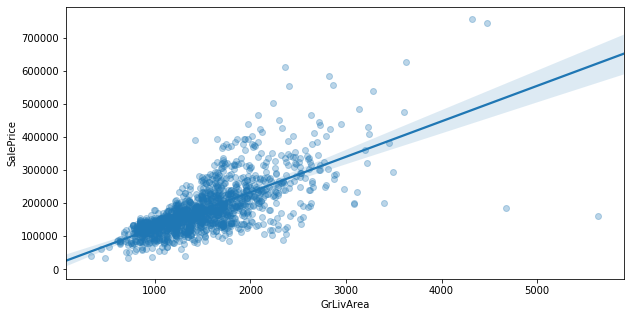

In [49]:
#Detectando e lidando com outliers
#No exemplo abaixo é possível notar que algumas casas que possuem maior área são vendidas por um preço menor
plt.figure(figsize=(10,5))
sns.regplot(dataset.GrLivArea, dataset.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [50]:
#no exemplo acima percebemos que apenas poucas casas possuem a GrLivArea maior que 4000, sendo que muitas são outliers
#por isso serão removidas
dataset.drop(dataset[dataset.GrLivArea >= 4000].index, inplace=True)

In [51]:
#Realizando feature engeneering para reduzir a quantidade de colunas
#Será agrupadas as colunas relacionadas ao tamanho da residência, de forma a existir somente uma coluna para cada ambiente
dataset['TotalSF'] = dataset.TotalBsmtSF + dataset.GrLivArea
dataset['TotalFloorSf'] = dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset['TotalPorchSF'] = dataset.OpenPorchSF + dataset.EnclosedPorch + dataset['3SsnPorch'] + dataset['ScreenPorch']

In [52]:
#Criando features binárias
#Essas features representarão se a residência possui certos itens
dataset['HasBasemant'] = dataset.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
dataset['HasGarage'] = dataset.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
dataset['HasPorch'] = dataset.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
dataset['HasPool'] = dataset.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)

In [53]:
#Essas features representam, respectivamente, se a casa sofreu Reforma,se ela é nova e se a venda foi concluída 
dataset['WasRemodeled'] = (dataset.YearRemodAdd != dataset.YearBuilt).astype(np.int64)
dataset['IsNew'] = (dataset.YearBuilt > 2000).astype(np.int64)
dataset['WasCompleted'] = (dataset.SaleCondition != 'Partial').astype(np.int64)

C:\Users\Philippe\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [54]:
featuresBinarias = ['HasBasemant', 'HasGarage', 'HasPorch', 'HasPool', 'WasRemodeled', 'IsNew', 'WasCompleted']

In [55]:
featuresNumericas = dataset.select_dtypes(include = [np.number])
featuresCategoricas = dataset.select_dtypes(exclude = [np.number])
print('Temos {0} features numéricas e {1} features categóricas'.format(featuresNumericas.shape, featuresCategoricas.shape))

Temos (1456, 84) features numéricas e (1456, 7) features categóricas


In [56]:
#Separando variaveis numéricas das binárias
featuresNumericas = [f for f in featuresNumericas if f not in featuresBinarias ]

In [57]:
#Criando uma feature numérica para unificar todos os banheiros, 
#caso ele seja completo será dado o valor 1 caso seja banheiro social sera dado o valor 0.5
dataset['TotalBathrooms'] = dataset.FullBath + .5 * dataset.HalfBath + dataset.BsmtFullBath + .5 * dataset.BsmtHalfBath 

In [58]:
#Executando o Logarítimo nas variáveis numéricas, pois como visto muitas estão desbalanceadas
featuresLog = featuresNumericas + ['SalePrice']
for f in featuresLog:
    dataset.loc[:,f] = np.log1p(dataset[f])

In [59]:
salePrice = dataset['SalePrice']

In [60]:
#Removendo Id por não ter valor no modelo, e SalePrice já que ela é o alvo da predição do modelo
dataset.drop('SalePrice', axis=1, inplace=True)
dataset.drop('Id', axis=1, inplace=True)

In [61]:
#preparando o modelo
modelo = pd.get_dummies(dataset).copy()

In [62]:
modelo.shape

(1456, 145)

In [63]:
modelo.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalFloorSf,TotalPorchSF,HasBasemant,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,TotalBathrooms,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,LandContour_1,LandContour_2,LandContour_3,LandContour_Low,Condition2_1,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,Condition2_8,Condition2_Feedr,HouseStyle_1,HouseStyle_2,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofStyle_6,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior1st_Stone,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_16,Exterior2nd_CmentBd,Exterior2nd_Stone
0,4.110874,4.189655,9.042040,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,2.079442,1.791759,7.602900,7.602900,0.693147,0.693147,5.283204,0.693147,1.098612,0.693147,0.693147,1.098612,1.098612,0.693147,6.561031,1.386294,0.0,5.017280,6.753438,0.693147,0.693147,0.693147,0.693147,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,0.693147,2.197225,0.693147,0.000000,0.693147,0.693147,7.602900,0.693147,1.098612,6.308098,0.693147,1.098612,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,1.098612,1.609438,1.609438,0.0,1.098612,7.605392,0.693147,0.693147,7.850493,7.444833,4.127134,1,1,1,1,0,1,1,3.5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.044522,4.394449,9.169623,0.693147,0.693147,0.693147,0.693147,1.098612,0.693147,1.098612,1.098612,0.693147,1.945910,2.197225,7.589336,7.589336,0.693147,1.098612,0.000000,1.098612,1.098612,1.098612,0.693147,1.098612,0.693147,1.098612,6.886532,1.386294,0.0,5.652489,7.141245,0.693147,0.693147,0.693147,0.693147,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1.098612,1.945910,0.693147,0.693147,1.098612,0.693147,7.589336,0.693147,1.098612,6.133398,0.693147,1.098612,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,1.098612,1.609438,1.609438,0.0,1.791759,7.604894,0.693147,0.693147,7.833996,7.141245,0.000000,1,1,1,1,0,0,1,2.5,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.110874,4.234107,9.328212,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,2.079442,1.791759,7.601902,7.602401,0.693147,0.693147,5.093750,0.693147,1.098612,0.693147,0.693147,1.098612,1.386294,0.693147,6.188264,1.386294,0.0,6.075346,6.825460,0.693147,0.693147,0.693147,0.693147,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,0.693147,1.945910,0.693147,0.693147,1.098612,0.693147,7.601902,0.693147,1.098612,6.411818,0.693147,1.098612,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,1.098612,1.609438,1.609438,0.0,2.302585,7.605392,0.693147,0.693147,7.903596,7.488294,3.761200,1,1,1

In [64]:
#Nesse ponto vamos dividir nossos dados entre Treinamento e teste usando train_test_split.
#Deixando 70% para treino que da um total de 1019 linhas de dados e 30% para o teste um total de 437 linhas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modelo.copy(), salePrice, test_size= 0.3, random_state=42)

In [65]:
featuresNumericas.remove('Id')
featuresNumericas.remove('SalePrice')

In [66]:
#Usando o RovustScaler e o StandartScaler, vamos padronizar as features numéricas entre os valores 0 e 1
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = StandardScaler()
X_train.loc[:, featuresNumericas] = scaler.fit_transform(X_train[featuresNumericas])
X_test.loc[:, featuresNumericas] = scaler.transform(X_test[featuresNumericas])

In [67]:
#Realizando uma validação cruzada, O site de onde tiramos os dados recomenda o uso do cross_val_score
#para realizar a avalidação cruzada
from sklearn.model_selection import cross_val_score

def rsme(model, x, y):
    cv_scores = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [68]:
#Realizando a redução de features no modelo de acordo com sua importancia
#A ferramenta Lasso classifica a importancia de cada feature de acordo com seu impacto na feature SalePrice
#O resultado mostra que o valor de erro do treino e do teste são muito similares
#Essa similaridade indica que o modelo pode estar sofrendo overfitting
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.0001, 0.001, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.00937 | Test RSME: 0.01007 | alpha: 0.00009


In [69]:
#Usando lasso as features menos importantes são removidas reduzindo o overfitting do modelo
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(sum(coefs.coefs == 0), coefs.shape[0]))

LASSO dropped 70 of 145 features.


In [70]:
top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)


In [71]:
top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))


<Figure size 576x720 with 0 Axes>

<Figure size 576x720 with 0 Axes>

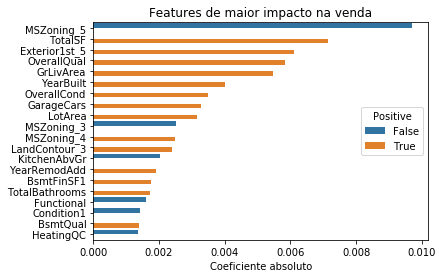

In [75]:

sns.barplot(top_coefs.coefs_abs,top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Features de maior impacto na venda')
plt.xlabel('Coeficiente absoluto')
plt.show()

In [72]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, max_depth = 6, min_child_weight=1.5, n_estimators=7200
                         , reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)

In [73]:
regr.fit(X_train[top_coefs.index], y_train)

[11:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=7200, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.9,
             reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
             subsample=0.2, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [74]:
#Erro de 0,013 no modelo, considerado baixo.
from sklearn.metrics import mean_squared_error
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

y_pred = regr.predict(X_test[top_coefs.index])

print(rmse(y_test, y_pred))

0.013389231549273097


In [138]:
y_test.head()

497     2.574343
1264    2.573090
411     2.556025
1048    2.537870
1035    2.512731
Name: SalePrice, dtype: float64

[2.5727346 2.5747523 2.555311  2.545638  2.50935   2.4948452 2.58532
 2.5475168 2.5591152 2.5541987 2.5434158 2.5911767 2.5788465 2.5915127
 2.5325038 2.5370102 2.5848212 2.5381713 2.5955403 2.5883708 2.500973
 2.5861423 2.5313053 2.5479574 2.586232  2.5702393 2.5413451 2.5339906
 2.5647156 2.5474    2.5400798 2.5817578 2.5307908 2.5335495 2.5456855
 2.5897987 2.5957859 2.5577981 2.589799  2.525684  2.5433488 2.5936105
 2.5705752 2.5574849 2.5960972 2.5884144 2.5772598 2.5511825 2.5568209
 2.5458949 2.5629337 2.5479767 2.5888977 2.538519  2.5792406 2.595729
 2.585763  2.584994  2.5605264 2.5636957 2.5063553 2.5961313 2.5954247
 2.5400527 2.595958  2.586121  2.5947816 2.5964983 2.5366051 2.5678194
 2.5733826 2.5626905 2.559275  2.5355678 2.5588703 2.5580192 2.593924
 2.5497947 2.5520344 2.5311816 2.5364473 2.5767124 2.57256   2.520002
 2.5445786 2.5475593 2.5935857 2.5940075 2.5560539 2.5624228 2.5715141
 2.5662632 2.5341587 2.5940564 2.5490196 2.5409598 2.578434  2.560629
 2.5901985 2.